In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from potentials import GC21
plt.style.use('../figures/mplt.mplstyle')

/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
GC21LMC1 = GC21(LMC_model='LMC1')
GC21LMC2 = GC21(LMC_model='LMC2')
GC21LMC3 = GC21(LMC_model='LMC3')
GC21LMC4 = GC21(LMC_model='LMC4')

In [7]:
GC21LMC1_mwpot = GC21LMC1.milkyway()
GC21LMC1_satpot = GC21LMC1.lmc()

GC21LMC2_mwpot = GC21LMC2.milkyway()
GC21LMC2_satpot = GC21LMC2.lmc()

GC21LMC3_mwpot = GC21LMC3.milkyway()
GC21LMC3_satpot = GC21LMC3.lmc()

GC21LMC4_mwpot = GC21LMC4.milkyway()
GC21LMC4_satpot = GC21LMC4.lmc()

In [8]:
GC21LMC1_mwpot.save('GC21LMC1.potential')
GC21LMC2_mwpot.save('GC21LMC2.potential')
GC21LMC3_mwpot.save('GC21LMC3.potential')
GC21LMC4_mwpot.save('GC21LMC4.potential')

In [9]:
q = [np.zeros(50), np.zeros(50), np.logspace(-2, 1.5, 50)]

In [10]:
vc_mw = GC21LMC1_mwpot.circular_velocity(q)
vc_lmc1 = GC21LMC1_satpot.circular_velocity(q)
vc_lmc2 = GC21LMC2_satpot.circular_velocity(q)
vc_lmc3 = GC21LMC3_satpot.circular_velocity(q)
vc_lmc4 = GC21LMC4_satpot.circular_velocity(q)

In [11]:
def load_rc_data():
    MWrc = np.loadtxt('../data/MWDR3rc.txt')
    Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference = np.genfromtxt('../data/LMCrc.txt', 
                                                                   usecols=[0, 4, 5, 6, 7], 
                                                                   unpack=True, delimiter=',',
                                                                   dtype=['f4', 'f4', 'f4', 'f4', 'S22'])
    return MWrc, Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference
    
MWrc, Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference = load_rc_data()
    

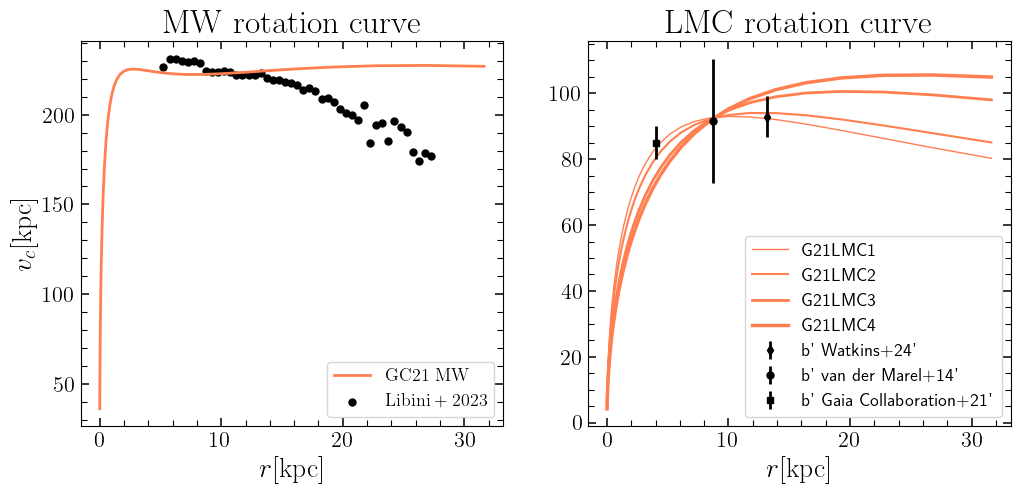

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(q[2], vc_mw, c='coral', label=r'$\rm{GC21\ MW}$')
ax[1].plot(q[2], vc_lmc1, c='coral', lw=1, label='G21LMC1')
ax[1].plot(q[2], vc_lmc2, c='coral', lw=1.5, label='G21LMC2')
ax[1].plot(q[2], vc_lmc3, c='coral', lw=2, label='G21LMC3')
ax[1].plot(q[2], vc_lmc4, c='coral', lw=2.5, label='G21LMC4')

ax[0].set_xlabel(r'$r\rm{[kpc]}$')
ax[1].set_xlabel(r'$r\rm{[kpc]}$')
ax[0].set_ylabel(r'$v_c \rm{[kpc]}$')
ax[0].set_title(r'$\rm{MW\ rotation\ curve}$')
ax[1].set_title(r'$\rm{LMC\ rotation\ curve}$')
ax[0].scatter(MWrc[:,0], MWrc[:,1], c='k', label=r'$\rm{Libini+2023}$')
markers = ['d', 'o', 's']
for i in range(len(Rlmc)):
    ax[1].errorbar(Rlmc[i], vcLMC[i], yerr=vcLMC_errl[i], fmt=markers[i], label=reference[i], c='k')

ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
#plt.savefig('../figures/GC21_model.pdf', bbox_inches='tight')
plt.show()

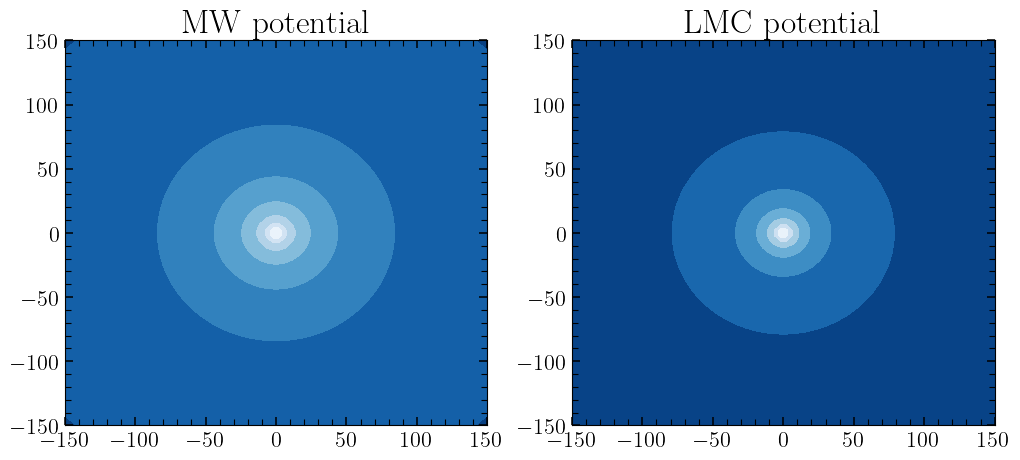

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title(r'$\rm{MW\ potential}$')
ax[1].set_title(r'$\rm{LMC\ potential}$')

grid = np.linspace(-150, 150, 64)
GC21LMC1_mwpot.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[0])
GC21LMC1_satpot.plot_contours(grid=(grid,grid,0), cmap='Blues', ax=ax[1])